In [9]:
import numpy as np
import importlib
import jax
import matplotlib.pyplot as plt
import jax.numpy as jnp
import math

import J_sampler
import J_inference
import J_diagnostics
import GGM_sampler
import GGM_inference
import GGM_diagnostics

In [10]:
importlib.reload(J_inference)
importlib.reload(J_sampler)
importlib.reload(J_diagnostics)

<module 'J_diagnostics' from '/Users/lucaraffo/Desktop/final/J_diagnostics.py'>

In [11]:
importlib.reload(GGM_inference)
importlib.reload(GGM_sampler)
importlib.reload(GGM_diagnostics)

<module 'GGM_diagnostics' from '/Users/lucaraffo/Desktop/final/GGM_diagnostics.py'>

In [12]:
n_spins = 4
n_samples = 10000

In [13]:
J = J_sampler.J_maker_01(n_spins)
h = jnp.diag(J)

In [14]:
samples = J_sampler.J_sampler_noise(n_samples, J, h, p = 0.001)

In [15]:
histogram = J_sampler._samples_to_histogram(samples[:5000])

In [16]:
J_hat, _ = J_inference.inverse_ising("MPF", 0.1, "Y", histogram)

λ = 0.0033966  (reg = 0.1)
[1/4] reconstruction spin 0
[2/4] reconstruction spin 1
[3/4] reconstruction spin 2
[4/4] reconstruction spin 3


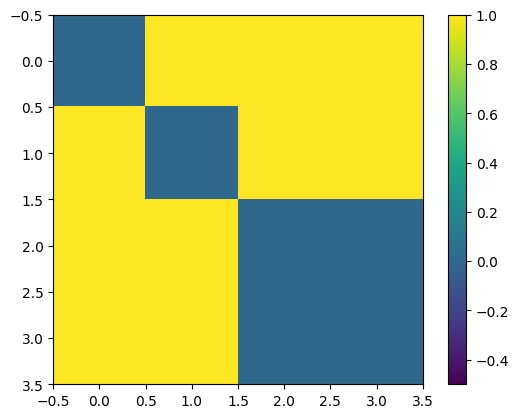

In [17]:
plt.imshow(J, cmap="viridis", vmin = -0.5, vmax = 1)  # fissa scala colori tra -2 e 2
plt.colorbar()
plt.show()

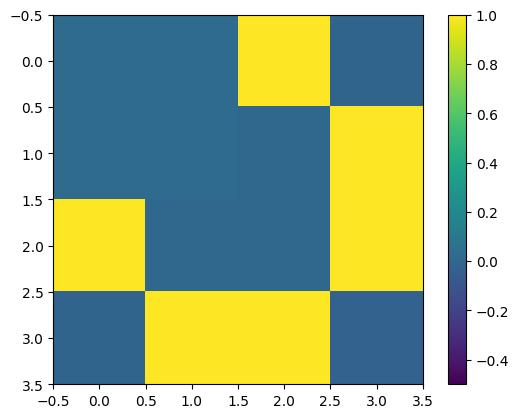

In [18]:
plt.imshow(J_hat, cmap="viridis", vmin = -0.5, vmax = 1)  # fissa scala colori tra -2 e 2
plt.colorbar()
plt.show()

In [21]:
J

Array([[0., 1., 1., 1.],
       [1., 0., 1., 1.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.]], dtype=float32)

In [22]:
J_hat

array([[ 0.02331559,  0.02304326,  1.0595075 , -0.01735466],
       [ 0.02304326,  0.02676496,  0.00700466,  1.022336  ],
       [ 1.0595075 ,  0.00700466,  0.00845019,  1.0110853 ],
       [-0.01735466,  1.022336  ,  1.0110853 , -0.027519  ]],
      dtype=float32)